# EDA

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("student-mat.csv")
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


# Elise's Part

# **Time Productivity vs. Grade**

<Axes: xlabel='Time Productivity', ylabel='G3'>

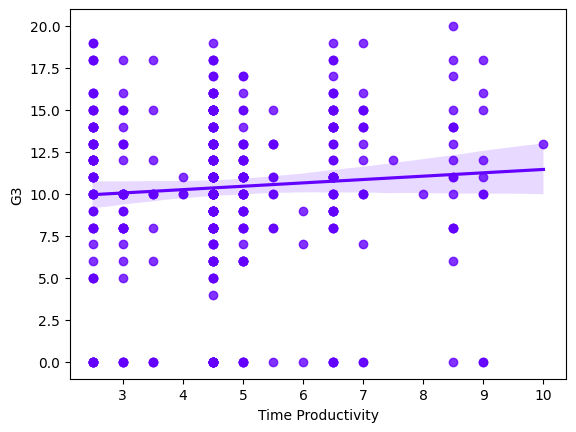

In [15]:
df['Time Productivity'] = 0.5 * df['traveltime'] + 2 * df['studytime']
sns.regplot(x='Time Productivity', y='G3', data=df,color='#6300FF')

As expected, students with a greater time productivity have better grades.

<Axes: xlabel='studytime', ylabel='G3'>

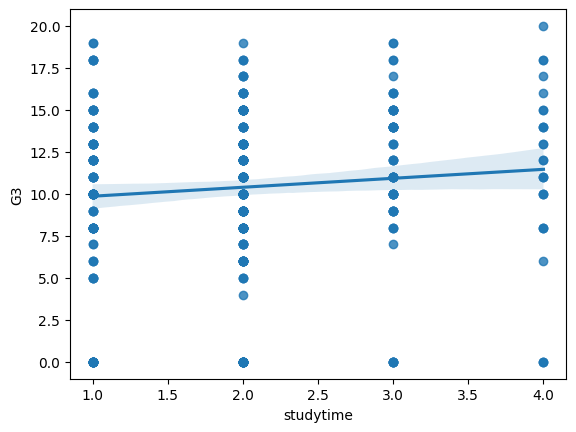

In [22]:
sns.regplot(x='studytime', y='G3', data=df)

<Axes: xlabel='traveltime', ylabel='G3'>

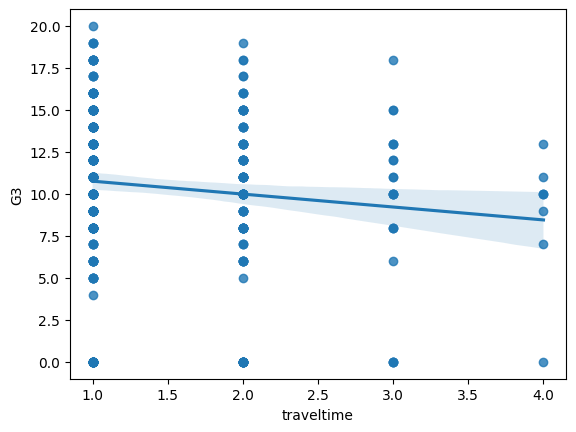

In [23]:
sns.regplot(x='traveltime', y='G3', data=df)

Another batch of expected results. Students who study more score better on tests and quizzes. In contrast, students who travel more perform worse on tests and quizzes.

This section confirmed the obvious: students who study more receive better grades whereas students who travel more or study less receive lower grades.

# **Absence VS Grade**

[Text(0.5, 1.0, 'Absences vs G3')]

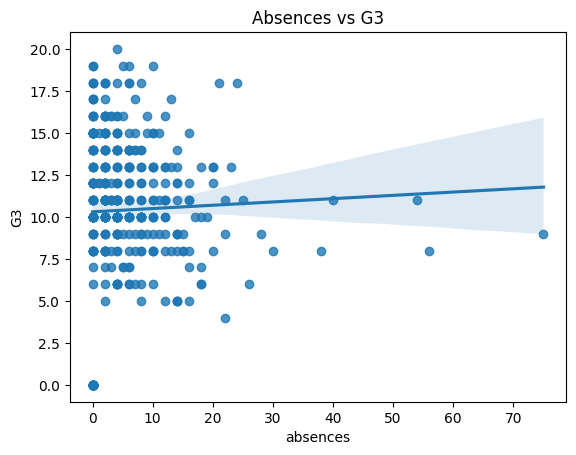

In [18]:
sns.regplot(x='absences', y='G3', data=df).set(title='Absences vs G3')

There seems to be no correlation between Absences and G3 and this is interesting we need to identify the potential cause for this phenomenon, and we need to examine more relationships on Absences to determine the cause.

[Text(0.5, 1.0, 'Absences vs G1')]

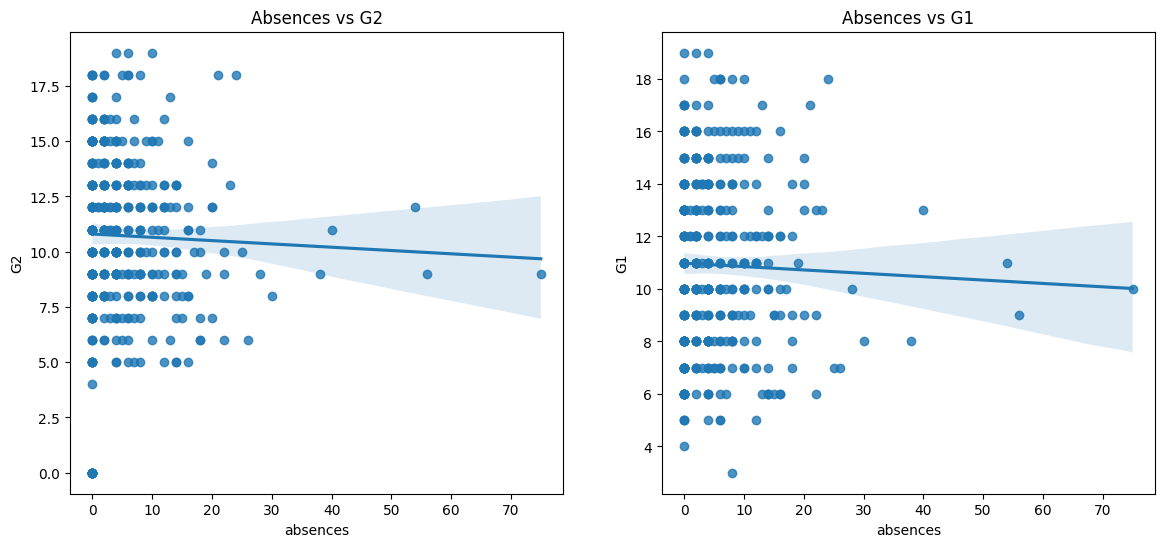

In [19]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.regplot(x='absences', y='G2', data=df, ax=axes[0])
axes[0].set(title='Absences vs G2')

sns.regplot(x='absences', y='G1', data=df, ax=axes[1])
axes[1].set(title='Absences vs G1')

This low correlation is because absent students (usually) revise the material missed, effectively accounting for their absence.

For a further explanation, we need to plot the correlation matrix to validate our hypothesis.

<Axes: >

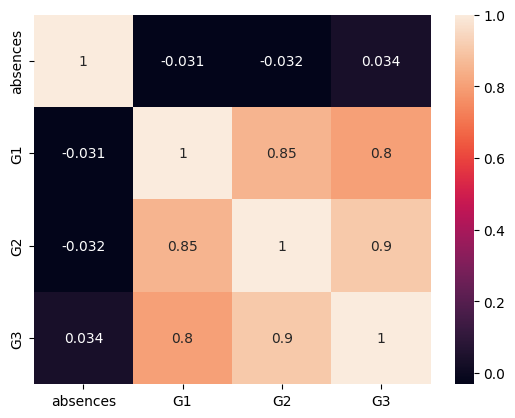

In [21]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)

The number of absences a student has does not necessarily result in a lower grade overall, as absent students typically make up the material they missed, effectively accounting for their absence.

# **Central Limit Theorem**

Sampling Distribution of Mean Grades: Understand the distribution of average grades for G3 by creating sampling distributions through repeated sampling, helping in making predictions about student performance.

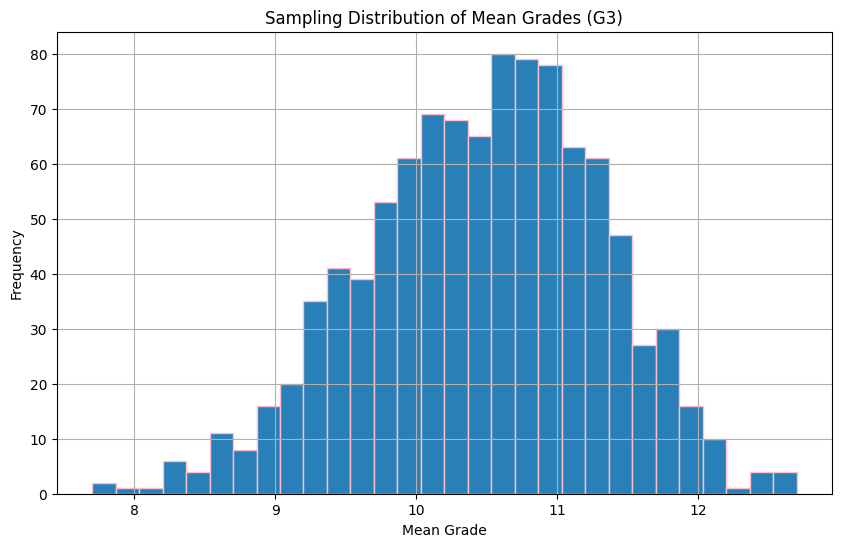

In [26]:
# defining the number of samples and sample size
number_of_samples = 1000
sample_size = 30

# sampling from the G3 grades and calculating sample means
sample_means = [df['G3'].sample(sample_size, replace=True).mean() for _ in range(number_of_samples)]

# Plotting the distribution of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, edgecolor='pink', color='#2980B9')
plt.title('Sampling Distribution of Mean Grades (G3)')
plt.xlabel('Mean Grade')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# **Risk Assessment:**

**Risk of Academic Failure: Calculate the risk factors associated with academic failures (failures). Risk assessment could identify key predictors of failure, helping to target interventions.**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm


# preparing the dataset: converting 'failures' into a binary outcome where 1 represents having any failures and 0 represents no failures
df['fail_bin'] = (df['failures'] > 0).astype(int)

# selecting predictors - these can include several factors
predictors = ['age', 'absences', 'goout', 'studytime', 'health', 'famrel', 'Medu', 'Fedu']

# preparing the independent variables (add a constant to the model)
X = df[predictors]
X = sm.add_constant(X)

# dependent variable
y = df['fail_bin']

# split the data into training and testing sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# fit a logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# showing results
print(result.summary())

# making predictions on the test set and evaluating the model
predictions = result.predict(X_test)
predictions = (predictions > 0.5).astype(int)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Optimization terminated successfully.
         Current function value: 0.403883
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               fail_bin   No. Observations:                  276
Model:                          Logit   Df Residuals:                      267
Method:                           MLE   Df Model:                            8
Date:                Fri, 24 May 2024   Pseudo R-squ.:                  0.2217
Time:                        10:30:58   Log-Likelihood:                -111.47
converged:                       True   LL-Null:                       -143.22
Covariance Type:            nonrobust   LLR p-value:                 9.578e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3665      2.670     -3.883      0.000     -15.599      -5.134
age            0.6082      0.